# Exploratory Data Analysis of Weather in Illinois

In [1]:
import pandas as pd # DataFrame library
import numpy as np # Array library
import matplotlib.pyplot as plt # Plotting library
import plotly.express as px # Interactive plotting library

In [2]:
desired_cols = ["id", "date", "time", "name", "element", "value", "latitude", "longitude", "elevation", "qflag"] # columns that are going to be used for analysis
desired_types = {"id": "string", 
                 "date": "string", 
                 "time": "string", 
                 "name": "string", 
                 "element": "string", 
                 "value": "float", 
                 "latitude": "float", 
                 "longitude": "float",
                 "elevation": "float",
                 "qflag": "string"} # the data types that will be assigned per column
raw_weather_data = pd.read_csv("./data/raw_illinois_weather_data.csv", usecols = desired_cols, dtype = desired_types) # load the data based on the desired data types and columns
raw_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19075802 entries, 0 to 19075801
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         string 
 1   date       string 
 2   time       string 
 3   element    string 
 4   value      float64
 5   qflag      string 
 6   latitude   float64
 7   longitude  float64
 8   name       string 
 9   elevation  float64
dtypes: float64(4), string(6)
memory usage: 1.4 GB


In [3]:
raw_weather_data["qflag"].unique() # The qflag represents quality of the measurement (we want the rows that don't have quality issues which is denoted <NA>)

<StringArray>
[<NA>, 'I', 'L', 'D', 'O', 'G', 'S', 'M', 'W', 'X', 'K', 'Z', 'N', 'T', 'R']
Length: 15, dtype: string

In [4]:
raw_weather_data["element"].unique() # Unique elements to gather data from. See the following website for more details https://docs.opendata.aws/noaa-ghcn-pds/readme.html#:~:text=SNWD%20%3D%20Snow%20depth%20(mm),temperature%20(tenths%20of%20degrees%20C)

<StringArray>
['MDPR', 'PRCP', 'SN32', 'SN52', 'SNOW', 'SNWD', 'SX32', 'SX52', 'TMAX',
 'TMIN', 'TOBS', 'WT01', 'WT03', 'AWND', 'PGTM', 'WDFG', 'WSFG', 'WT08',
 'WT17', 'WT15', 'WT16', 'EVAP', 'WDMV', 'WESD', 'DAPR', 'WESF', 'WT05',
 'WT11', 'WSF5', 'TAVG', 'MNPN', 'WT06', 'WDF2', 'WSF2', 'WT04', 'WDF5',
 'MXPN', 'WT18', 'DAEV', 'WT02', 'SN53', 'SX53', 'MDSF', 'MDEV', 'WT14',
 'DASF', 'DAWM', 'WT09', 'MDWM', 'WT07', 'FMTM', 'TSUN', 'PSUN', 'WT10',
 'ACMH', 'ACSH', 'WDF1', 'WSF1', 'RHMX', 'ADPT', 'AWBT', 'RHMN', 'ASLP',
 'WT13', 'WT22', 'ASTP', 'WT21', 'RHAV', 'WT19', 'WV18', 'SN02', 'SX02',
 'SX03', 'SN03', 'SN12', 'SX12', 'WV03', 'WV20', 'WV01']
Length: 79, dtype: string

In [5]:
num_of_temp_stations = raw_weather_data["name"].nunique() # number of stations in Illinois
num_of_temp_stations

1950

In [6]:
raw_weather_data.shape

(19075802, 10)

In [7]:
raw_weather_data["time"].fillna("0000", inplace = True) # replace all nan values with "0000"

In [8]:
np.sort(raw_weather_data["time"].apply(len).unique()) # helps to verify how many unique length characters there was in the "time" column. 
# there should only be one of length 4 characters to be able to parse into datetime format.

array([4])

In [9]:
raw_weather_data["time"] = raw_weather_data["time"].apply(lambda x: f"{x[:-2]}:{x[-2:]}:00") # added a seconds placeholder for parsing
raw_weather_data["time"] = pd.to_timedelta(raw_weather_data["time"]) # converts string format to datetime format for the time column

In [10]:
raw_weather_data["date"] = pd.to_datetime(raw_weather_data["date"]) # converts the string format to a datetime format for the date column
raw_weather_data["date"] = raw_weather_data["date"] + raw_weather_data["time"] # combines date and time into the same column which can be accessed via object attributes
raw_weather_data.drop(columns = ["time"], inplace = True) # drops the redundant time column
raw_weather_data = raw_weather_data[raw_weather_data["qflag"].isna()].drop(columns = ["qflag"]) # gets rid of the rows that have quality issues
raw_weather_data

,id,date,element,value,latitude,longitude,name,elevation
0,USW00093809,1994-04-18 00:00:00,MDPR,262.0,37.0422,-89.1856,CAIRO 3N,95.4
1,USC00111280,1994-02-03 18:00:00,PRCP,0.0,39.2881,-89.8697,CARLINVILLE,186.2
2,USC00117187,1994-01-26 00:00:00,PRCP,0.0,38.0406,-88.9883,REND LAKE DAM,138.7
3,USC00112145,1994-02-24 07:00:00,PRCP,5.0,40.1019,-87.5961,DANVILLE SEWAGE PLT,163.4
4,USC00118146,1994-12-28 07:00:00,PRCP,0.0,41.0314,-89.4403,SPARLAND,174.7
...,...,...,...,...,...,...,...,...
19075797,USC00112500,2010-10-01 07:00:00,TMAX,244.0,41.1072,-88.4111,DWIGHT,191.4
19075798,USC00119021,2010-10-13 07:00:00,TMAX,283.0,40.7939,-87.7544,WATSEKA 2NW,191.4
19075799,USC00113717,2010-10-20 05:00:00,TOBS,67.0,39.7378,-90.7086,GRIGGSVILLE,191.4
19075800,USC00112500,2010-11-28 07:00:00,TMIN,-67.0,41.1072,-88.4111,DWIGHT,191.4


### The cell below pivots the element values into columns which are more useful in column format.

In [11]:
raw_weather_pivot = raw_weather_data.pivot(columns = "element", values = "value")
raw_weather_pivot

element,ACMH,ACSH,ADPT,ASLP,ASTP,AWBT,AWND,DAEV,DAPR,DASF,...,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03,WV18,WV20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19075797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19075798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19075799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19075800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
transformed_data = pd.concat([raw_weather_data, raw_weather_pivot], axis = 1) # combine the newly generated columns with the existing dataframe
transformed_data.drop(columns = ["element", "value"], inplace = True) # drop the element and value columns
transformed_data.to_csv("./data/transformed_illinois_weather_data.csv", index = False) # export the pivot table as a csv file for future analysis
transformed_data

,id,date,latitude,longitude,name,elevation,ACMH,ACSH,ADPT,ASLP,...,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03,WV18,WV20
0,USW00093809,1994-04-18 00:00:00,37.0422,-89.1856,CAIRO 3N,95.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00111280,1994-02-03 18:00:00,39.2881,-89.8697,CARLINVILLE,186.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00117187,1994-01-26 00:00:00,38.0406,-88.9883,REND LAKE DAM,138.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00112145,1994-02-24 07:00:00,40.1019,-87.5961,DANVILLE SEWAGE PLT,163.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00118146,1994-12-28 07:00:00,41.0314,-89.4403,SPARLAND,174.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19075797,USC00112500,2010-10-01 07:00:00,41.1072,-88.4111,DWIGHT,191.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19075798,USC00119021,2010-10-13 07:00:00,40.7939,-87.7544,WATSEKA 2NW,191.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19075799,USC00113717,2010-10-20 05:00:00,39.7378,-90.7086,GRIGGSVILLE,191.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19075800,USC00112500,2010-11-28 07:00:00,41.1072,-88.4111,DWIGHT,191.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
temp_data = transformed_data[["id", "name", "date", "TMIN", "TMAX", "TOBS", "TAVG"]]
convert_temp = lambda df, temp_label: 9/5 * (df[temp_label] / 10) + 32 # convert tenths of a degree Celsius to Fahrenheit
temp_data.loc[:, "TMIN"] = convert_temp(temp_data, "TMIN")
temp_data.loc[:, "TMAX"] = convert_temp(temp_data, "TMAX")
temp_data.loc[:, "TOBS"] = convert_temp(temp_data, "TOBS")
temp_data.loc[:, "TAVG"] = convert_temp(temp_data, "TAVG")

/var/folders/j5/byfswq3j1bg3s3yk6x9qdzbr0000gp/T/ipykernel_1737/2409927797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data["TMIN"] = convert_temp(temp_data, "TMIN")
/var/folders/j5/byfswq3j1bg3s3yk6x9qdzbr0000gp/T/ipykernel_1737/2409927797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data["TMAX"] = convert_temp(temp_data, "TMAX")
/var/folders/j5/byfswq3j1bg3s3yk6x9qdzbr0000gp/T/ipykernel_1737/2409927797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

### This cell below plots the minimum, maximum, and observed temperatures.

#### Note: ``pandas.DataFrame.plot`` attribute can be used to shorten the time to make a plot. The tradeoff is less customization of the plot.

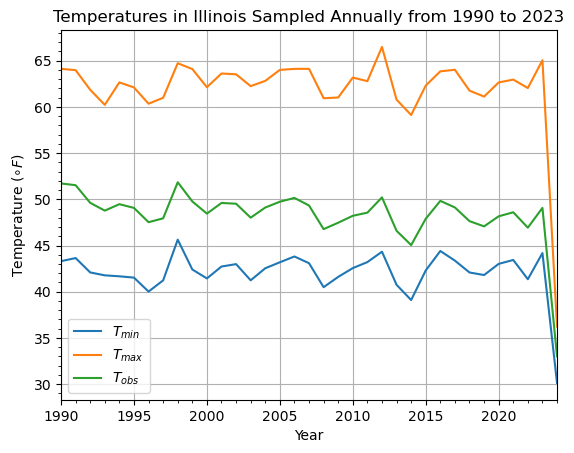

In [15]:
# Resample the temperature data annually and calculate the mean
numeric_data = temp_data.select_dtypes(include = ["datetime64[ns]", "float"])
resampled_data = numeric_data.resample("Y", on="date").mean()
resampled_data.index = pd.to_datetime(resampled_data.index)
tmin_label = r"$T_{min}$"
tmax_label = r"$T_{max}$"
tobs_label = r"$T_{obs}$"

# Plotting TMIN, TMAX, and TOBS
plt.plot(resampled_data.index.year, resampled_data["TMIN"], label= tmin_label)
plt.plot(resampled_data.index.year, resampled_data["TMAX"], label= tmax_label)
plt.plot(resampled_data.index.year, resampled_data["TOBS"], label= tobs_label)

# Set labels and title
plt.xlabel("Year")
plt.ylabel(r"Temperature ($\circ F$)")
plt.title("Temperatures in Illinois Sampled Annually from 1990 to 2023")

# Display the legend
plt.legend(loc="best")

# Fixes the x-range so that it's between 1990 and 2023
plt.xlim(resampled_data.index.year.min(), resampled_data.index.year.max())

# Display the grid
plt.grid()

# Display minor ticks
plt.minorticks_on()

# Show the plot
plt.show()

### The cell below plots the temeprature difference for the minimum, maximum, and observed temperatures.

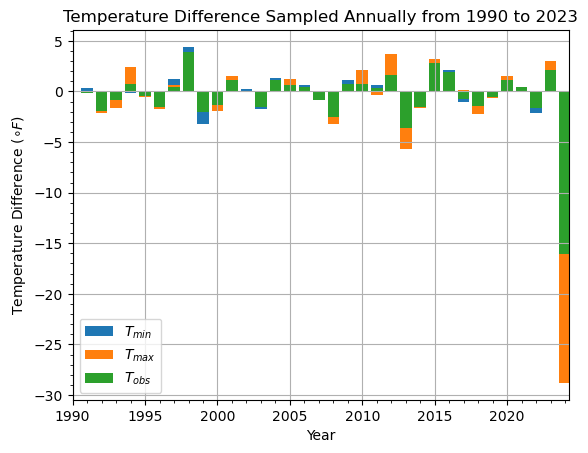

In [16]:
# Plotting the temperature gradient (difference) for TMIN, TMAX, TOBS
plt.bar(resampled_data.index.year, resampled_data["TMIN"].diff(), label = tmin_label)
plt.bar(resampled_data.index.year, resampled_data["TMAX"].diff(), label = tmax_label)
plt.bar(resampled_data.index.year, resampled_data["TOBS"].diff(), label = tobs_label)

# Adding labels and legend
plt.xlabel("Year")
plt.ylabel(r"Temperature Difference ($\circ F$)")
plt.legend(loc = "lower left")

# Fix the x-range so that all the bars for each year display properly
plt.xlim(resampled_data.index.year.min(), resampled_data.index.year.max() + 0.25)

# Adding a title
plt.title("Temperature Difference Sampled Annually from 1990 to 2023")

# Display grid and minor ticks
plt.grid()
plt.minorticks_on()

# Show the plot
plt.show()

In [18]:
num_obs_per_station = transformed_data.groupby("name", as_index = False)["date"].count() # number of observations per station w.r.t. TMIN, TMAX, TOBS
num_obs_per_station.rename(columns = {"date": "obs_count"}, inplace = True)
num_obs_per_station.sort_values(by = "obs_count")

,name,obs_count
402,CLARENDON HILLS 0.6 S,1
164,BLOOMINGTON 4.3 ENE,16
1602,RUSHVILLE 2.4 S,25
100,BARTLETT 1.4 SE,26
859,INA,35
...,...,...
1177,MOLINE QUAD CITY INTL AP,191505
381,CHICAGO OHARE INTL AP,196817
688,GENERAL WAYNE A DOWNING INTL A,198229
1698,SPRINGFIELD ABRAHAM LINCOLN CA,198881


In [19]:
num_obs_per_station.describe()

,obs_count
count,1950.000000
mean,9751.868205
std,20419.409999
min,1.000000
25%,698.750000
50%,2143.500000
75%,7348.250000
max,202329.000000


In [21]:
stations_in_between_quantiles = (num_obs_per_station["obs_count"] > num_obs_per_station["obs_count"].quantile(0.25)) & (num_obs_per_station["obs_count"] < num_obs_per_station["obs_count"].quantile(0.75))
num_obs_per_station[stations_in_between_quantiles].sort_values(by = "obs_count")

,name,obs_count
1176,MOLINE BRG,701
106,BATAVIA 0.8 S,703
1470,PIPER CITY 0.2 ESE,707
420,COLLISON 2.0 SE,708
255,CARLINVILLE 0.5 NNE,712
...,...,...
1265,NAPERVILLE 2.4 SE,7271
512,DEWEY 1.6 NNW,7281
635,FINDLAY 2NW,7290
620,EVANSTON 1.4 N,7341


In [22]:
def map_of_temps_for_each_year(df, start_year, end_year):
    """Generates an animated map with a time slider for each year using Plotly.

    Args:
        df (pandas.DataFrame): the dataset that will be plotted on the map
        start_year (int): The starting year for the range of years
        end_year (int): The ending year for the range of years
    """
    # Filter data for the specified year range
    filtered_data = df[df["date"].dt.year.between(start_year, end_year)]

    # Create a DataFrame for Plotly
    plotly_df = filtered_data.rename(columns={
        'latitude': 'lat',
        'longitude': 'lon',
    })

    # Create an animated map using Plotly Express
    fig = px.scatter_geo(plotly_df,
                         lon='lon',
                         lat='lat',
                         animation_frame='year',
                         color='TOBS',
                         title='Yearly Temperature Map',
                         )

    # Save the map
    fig.write_html("Yearly Temperature Map.html")

# Generates a map with a drop down menu from the years 1990 to 2023
map_of_temps_for_each_year(transformed_data, 1990, 2023)